<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Classification Model Building </center></h1>

# Prior to getting started:

First, 
<br>if you have just received a new api key from support, you will need to register your key and create a new user (see Register user cell)

Second, in the Environment Variables cell: 
1. Set your username and password to ensure that you're able to log in successfully
2. Set the path to the location of your datasets if you are using your own data.  The path is set for the examples.
3. Set the dataset names accordingly

Here are a few things to be mindful of:
1. For every run, check the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can benefit from extra training, use the resume function.

## Set Darwin SDK

In [1]:
from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

## Register user (if needed, read above)

In [2]:
# Use only if you have a new api-key and 
# no registered users - fill in the appropriate fields then execute

#Enter your support provided api key and api key password below to register/create new users
api_key = 'yuboszhz@outlook.com'
api_key_pw = 'dU9HY2Wdxb'
status, msg = ds.auth_login_user(api_key,api_key_pw)
if not status:
    print(msg)


#Create a new user
status, msg = ds.auth_register_user('username', 'password','email@emailaddress.com')
if not status:
    print(msg)



403: FORBIDDEN - {"message": "You have exceeded your user limit"}



In [ ]:
#Set your user id and password accordingly
USER="YU; BO"
PW="dU9HY2Wdxb"

# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())

## Import necessary libraries

In [26]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

## Feature Engineering

In [8]:
# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/ 
# from the file darwin provided
# Modify accordingly if the csv file is not found

PATH_TO_DATASET='../../sets/'
Data='SH baseline dataset_dataverse.csv'
TRAIN_DATASET='#####'
TEST_DATASET='####'

In [14]:
df = pd.read_csv(os.path.join(PATH_TO_DATASET, Data))
df.head()

,patient_id,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,cvdrisk,highrisk,bplt,lltt,aptt
0,7.709001e+09,65,Female,primary,married,self-employed,140.5,78.5,156.0,18.90204,nonsmoker,sepanjang,rural,<10%,No,No,No,No
1,7.709001e+09,60,Male,primary,married,self-employed,156.0,108.5,113.0,25.47666,smoker,sepanjang,rural,clinicall high risk,Yes,No,No,No
2,8.005070e+09,87,Male,primary,married,not working,153.5,77.0,91.0,NaN,pastsmoker,majangtengah,rural,20-30%,Yes,No,No,No
3,8.005070e+09,82,Female,primary,married,not working,152.0,76.0,114.0,23.89138,nonsmoker,majangtengah,rural,20-30%,Yes,No,No,No
4,8.005070e+09,55,Female,primary,widowed,casual worker,179.0,94.0,130.0,29.48870,nonsmoker,majangtengah,rural,clinicall high risk,Yes,No,No,No


In [16]:
#drop columns
df_alldata=df.drop(['patient_id'],axis=1)
df_alldata=df_alldata.drop(['bplt'],axis=1)
df_alldata=df_alldata.drop(['lltt'],axis=1)
df_alldata=df_alldata.drop(['aptt'],axis=1)
df_alldata=df_alldata.drop(['cvdrisk'],axis=1)
df_alldata.head()


,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,highrisk
0,65,Female,primary,married,self-employed,140.5,78.5,156.0,18.90204,nonsmoker,sepanjang,rural,No
1,60,Male,primary,married,self-employed,156.0,108.5,113.0,25.47666,smoker,sepanjang,rural,Yes
2,87,Male,primary,married,not working,153.5,77.0,91.0,NaN,pastsmoker,majangtengah,rural,Yes
3,82,Female,primary,married,not working,152.0,76.0,114.0,23.89138,nonsmoker,majangtengah,rural,Yes
4,55,Female,primary,widowed,casual worker,179.0,94.0,130.0,29.48870,nonsmoker,majangtengah,rural,Yes


In [38]:
# Separate majority and minority classes
df_alldata_majority = df_alldata[df_alldata.highrisk=="No"]
df_alldata_minority = df_alldata[df_alldata.highrisk=="Yes"]

In [39]:
# Downsample majority class
df_alldata_majority_downsampled = resample(df_alldata_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6500) # reproducible results
# Combine minority class with downsampled majority class
df_alldata_downsampled = pd.concat([df_alldata_majority_downsampled, df_alldata_minority])
# Display new class counts
df_alldata_downsampled.highrisk.value_counts()

No     6500
Yes    6453
Name: highrisk, dtype: int64

In [44]:
all_train, all_test = train_test_split(df_alldata_downsampled, test_size=0.20)
print(all_train.shape)
print(all_test.shape)

(10362, 13)
(2591, 13)


In [41]:
df_nobp=df.drop(['patient_id'],axis=1)
df_nobp=df_nobp.drop(['bplt'],axis=1)
df_nobp=df_nobp.drop(['lltt'],axis=1)
df_nobp=df_nobp.drop(['aptt'],axis=1)
df_nobp=df_nobp.drop(['sbp_avg'],axis=1)
df_nobp=df_nobp.drop(['dbp_avg'],axis=1)
df_nobp=df_nobp.drop(['cvdrisk'],axis=1)
df_alldata.head()
df_nobp.head()

,age,sex,education,marital_status,occupation,bg_mgdl,bmi,smoking,village,areas,highrisk
0,65,Female,primary,married,self-employed,156.0,18.90204,nonsmoker,sepanjang,rural,No
1,60,Male,primary,married,self-employed,113.0,25.47666,smoker,sepanjang,rural,Yes
2,87,Male,primary,married,not working,91.0,NaN,pastsmoker,majangtengah,rural,Yes
3,82,Female,primary,married,not working,114.0,23.89138,nonsmoker,majangtengah,rural,Yes
4,55,Female,primary,widowed,casual worker,130.0,29.48870,nonsmoker,majangtengah,rural,Yes


In [42]:
# Separate majority and minority classes
df_nobp_majority = df_nobp[df_nobp.highrisk=="No"]
df_nobp_minority = df_nobp[df_nobp.highrisk=="Yes"]

In [43]:
# Downsample majority class
df_nobp_majority_downsampled = resample(df_nobp_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=6500) # reproducible results
# Combine minority class with downsampled majority class
df_nobp_downsampled = pd.concat([df_nobp_majority_downsampled, df_nobp_minority])
# Display new class counts
df_nobp_downsampled.highrisk.value_counts()

No     6500
Yes    6453
Name: highrisk, dtype: int64

In [76]:
nobp_train, nobp_test = train_test_split(df_nobp_downsampled, test_size=0.20)
print(nobp_train.shape)
print(nobp_test.shape)
nobp_train.head()

(10362, 11)
(2591, 11)


,age,sex,education,marital_status,occupation,bg_mgdl,bmi,smoking,village,areas,highrisk
5016,51,Female,secondary,married,self-employed,135.0,31.59626,nonsmoker,cepokomulyo,urban,Yes
21842,45,Female,secondary,married,self-employed,47.0,27.29322,nonsmoker,kendalpayak,urban,No
13212,51,Male,primary,married,casual worker,91.0,21.04805,smoker,sepanjang,rural,No
11446,43,Male,primary,married,self-employed,104.0,26.85441,smoker,majangtengah,rural,Yes
3747,67,Male,primary,single,casual worker,122.0,23.55556,nonsmoker,cepokomulyo,urban,Yes


In [47]:
#path is current directory
path = '../../sets/'
filename = "all_train.csv"
all_train.to_csv(os.path.join(path, filename))

In [48]:
path = '../../sets/'
filename = "all_test.csv"
all_test.to_csv(os.path.join(path, filename))

In [49]:
#path is current directory
path = '../../sets/'
filename = "nobp_train.csv"
nobp_train.to_csv(os.path.join(path, filename))

In [50]:
path = '../../sets/'
filename = "nobp_test.csv"
nobp_test.to_csv(os.path.join(path, filename))

# User Login 

In [51]:
status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

# MODEL1: Data Upload and Clean

**Read dataset and view a file snippet**

In [52]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, "all_train.csv"))
df.head()

,Unnamed: 0,age,sex,education,marital_status,occupation,sbp_avg,dbp_avg,bg_mgdl,bmi,smoking,village,areas,highrisk
0,2443,48,Female,primary,married,private worker,122.0,84.5,128.0,35.37981,nonsmoker,mendalanwangi,semiurban,No
1,9616,67,Female,primary,widowed,casual worker,165.0,96.0,88.0,24.19649,nonsmoker,majangtengah,rural,Yes
2,7721,64,Male,secondary,married,self-employed,170.0,99.5,265.0,28.35539,nonsmoker,kepanjen,urban,Yes
3,20436,47,Female,primary,married,not working,160.5,116.0,121.0,21.90758,nonsmoker,cepokomulyo,urban,Yes
4,3390,47,Female,primary,married,casual worker,151.0,91.5,138.0,27.55556,nonsmoker,mendalanwangi,semiurban,No


**Upload dataset to Darwin**

In [53]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, "all_train.csv"))
if not status:
    print(dataset)

**Clean dataset**

In [54]:
# clean dataset
target = "highrisk"
status, job_id = ds.clean_data("all_train.csv", target = target, artifact_name = '"all_train_clean')

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)
#ds.lookup_artifact_name()
#ds.download_dataset('SHclean_data',artifact_path='../../sets/')


{'status': 'Requested', 'starttime': '2019-04-17T16:42:00.840001', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['all_train.csv'], 'artifact_names': ['"all_train_clean'], 'model_name': None, 'job_error': None}
{'status': 'Failed', 'starttime': '2019-04-17T16:42:00.840001', 'endtime': '2019-04-17T16:42:10.500412', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['all_train.csv'], 'artifact_names': ['"all_train_clean'], 'model_name': None, 'job_error': 'DarwinInternalErroruncaught'}


# MODEL1: Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default cancer dataset, the target column is "Diagnosis". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [55]:
model = target + "alldatamodel" + ts
status, job_id = ds.create_model(dataset_names = "all_train.csv", \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-17T16:42:46.81503', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T16:42:46.81503', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 0.39123573899269104, 'generations': 2, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:42:46.81503', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 0.39123573899269104, 'generations': 2, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:42:46.81503', 'endtime': None, 'percent_complet

# MODEL1: Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [56]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = "all_train.csv",
                                          model_name = model,
                                          max_train_time = '00:02')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T16:45:36.054497', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.39123573899269104, 'generations': 2, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T16:45:36.054497', 'endtime': None, 'percent_complete': 2, 'job_type': 'UpdateModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:45:36.054497', 'endtime': None, 'percent_complete': 2, 'job_type': 'UpdateModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': ['all_train.csv'], 'artifact_names': None, 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T16:45:36.054497', 'endtim

# MODEL1: Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [57]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-17T16:48:20.846816', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': None, 'artifact_names': ['7ea3f28f0d754c408bedceb6e7af0a3f'], 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T16:48:20.846816', 'endtime': '2019-04-17T16:48:29.687284', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': None, 'artifact_names': ['7ea3f28f0d754c408bedceb6e7af0a3f'], 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}


Show the 10 most important features of the model.

In [58]:
feature_importance[:10]

sbp_avg                     0.489324
dbp_avg                     0.361685
age                         0.042768
bmi                         0.023314
bg_mgdl                     0.021612
Unnamed: 0                  0.014487
smoking = pastsmoker        0.007452
occupation = not working    0.005183
smoking = smoker            0.005128
marital_status = widowed    0.003244
dtype: float64

# MODEL1: Predictions
**Perform model prediction on the the training dataset.**

In [60]:
status, artifact = ds.run_model("all_train.csv", model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-17T16:50:39.647619', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': ['all_train.csv'], 'artifact_names': ['2257a4a7e4ca46db82cfbefe27d8b654'], 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T16:50:39.647619', 'endtime': '2019-04-17T16:50:41.019771', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': ['all_train.csv'], 'artifact_names': ['2257a4a7e4ca46db82cfbefe27d8b654'], 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [61]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head(100)

,highrisk,prob_No,prob_Yes
0,No,0.973421,0.026579
1,Yes,0.002804,0.997196
2,Yes,0.001104,0.998896
3,Yes,0.000270,0.999730
4,No,0.910431,0.089569
5,No,0.935018,0.064982
6,No,0.805830,0.194170
7,No,0.833743,0.166257
8,Yes,0.002626,0.997374
9,Yes,0.000209,0.999791


Create plots comparing predictions with actual target

             precision    recall  f1-score   support

         No       0.90      0.99      0.94      5207
        Yes       0.99      0.88      0.93      5155

avg / total       0.94      0.94      0.94     10362



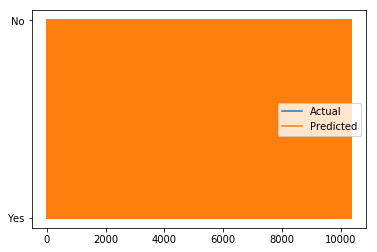

In [62]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

**Perform model prediction on a test dataset that wasn't used in training.** <br>
Upload test dataset

In [63]:
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, "all_test.csv"))
if not status:
    print(dataset)

Clean test dataset

In [64]:
# clean test dataset
status, job_id = ds.clean_data("all_test.csv", target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T16:53:20.696965', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['all_test.csv'], 'artifact_names': ['1a0810e8304d47cdbd70c5330ee0cecf'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T16:53:20.696965', 'endtime': '2019-04-17T16:53:22.248102', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['all_test.csv'], 'artifact_names': ['1a0810e8304d47cdbd70c5330ee0cecf'], 'model_name': None, 'job_error': ''}


Run model on test dataset.

In [65]:
status, artifact = ds.run_model("all_test.csv", model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Complete', 'starttime': '2019-04-17T16:53:52.529324', 'endtime': '2019-04-17T16:53:53.643173', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.39123573899269104, 'generations': 5, 'dataset_names': ['all_test.csv'], 'artifact_names': ['ff6e63942c7740bcba7ff7cdb84fc0a9'], 'model_name': 'highriskalldatamodel20190417160239', 'job_error': ''}


(True, 'Job completed')

Create plots comparing predictions with actual target

             precision    recall  f1-score   support

         No       0.89      0.99      0.93      1293
        Yes       0.99      0.88      0.93      1298

avg / total       0.94      0.93      0.93      2591



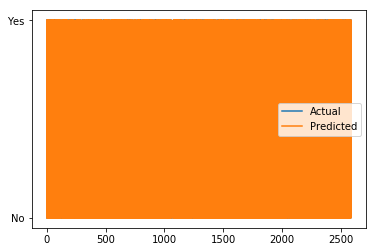

In [67]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(PATH_TO_DATASET, "all_test.csv"))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [68]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {}}


## MODEL1: Find out which machine learning model did Darwin use:

In [68]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {}}


# MODEL2: Data Upload and Clean

**Read dataset and view a file snippet**

In [70]:
# Preview dataset
df = pd.read_csv(os.path.join(PATH_TO_DATASET, "nobp_train.csv"))
df.head()

,Unnamed: 0,age,sex,education,marital_status,occupation,bg_mgdl,bmi,smoking,village,areas,highrisk
0,4485,65,Male,secondary,married,not working,123.0,24.16327,smoker,cepokomulyo,urban,Yes
1,9869,54,Male,primary,married,casual worker,124.0,24.45606,pastsmoker,majangtengah,rural,Yes
2,13412,49,Female,primary,married,not working,285.0,24.83576,nonsmoker,sepanjang,rural,Yes
3,7483,50,Male,higher,married,private worker,157.0,26.57313,smoker,kepanjen,urban,No
4,19331,51,Male,primary,married,casual worker,97.0,24.03441,nonsmoker,sepanjang,rural,No


**Upload dataset to Darwin**

In [71]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(PATH_TO_DATASET, "nobp_train.csv"))
if not status:
    print(dataset)

**Clean dataset**

In [72]:
# clean dataset
target = "highrisk"
status, job_id = ds.clean_data("nobp_train.csv", target = target, artifact_name = '"nobp_train_clean"')

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)
#ds.lookup_artifact_name()
#ds.download_dataset('SHclean_data',artifact_path='../../sets/')


{'status': 'Requested', 'starttime': '2019-04-17T17:03:23.661145', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['nobp_train.csv'], 'artifact_names': ['"nobp_train_clean"'], 'model_name': None, 'job_error': None}
{'status': 'Failed', 'starttime': '2019-04-17T17:03:23.661145', 'endtime': '2019-04-17T17:03:32.612522', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['nobp_train.csv'], 'artifact_names': ['"nobp_train_clean"'], 'model_name': None, 'job_error': 'DarwinInternalErroruncaught'}


# MODEL2: Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default cancer dataset, the target column is "Diagnosis". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [73]:
model = target + "nobpdatamodel" + ts
status, job_id = ds.create_model(dataset_names = "nobp_train.csv", \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T17:04:11.294701', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-17T17:04:11.294701', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': None}
{'status': 'Requested', 'starttime': '2019-04-17T17:04:11.294701', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T17:04:11.294701', 'endtime': None, 'percent_complete': 2, '

# MODEL2: Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [74]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = "nobp_train.csv",
                                          model_name = model,
                                          max_train_time = '00:02')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T17:07:32.839021', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.6207813686794705, 'generations': 2, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T17:07:32.839021', 'endtime': None, 'percent_complete': 4, 'job_type': 'UpdateModel', 'loss': 0.6207813686794705, 'generations': 5, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T17:07:32.839021', 'endtime': None, 'percent_complete': 4, 'job_type': 'UpdateModel', 'loss': 0.6207813686794705, 'generations': 5, 'dataset_names': ['nobp_train.csv'], 'artifact_names': None, 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T17:07:32.839021', 'end

# MODEL2: Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [77]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-17T17:12:35.739497', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.6231648723284403, 'generations': 5, 'dataset_names': None, 'artifact_names': ['389fb9e9d8454e49ac4ec7f5b7cff315'], 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T17:12:35.739497', 'endtime': '2019-04-17T17:12:37.100027', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.6231648723284403, 'generations': 5, 'dataset_names': None, 'artifact_names': ['389fb9e9d8454e49ac4ec7f5b7cff315'], 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': ''}


Show the 10 most important features of the model.

In [78]:
feature_importance[:10]

age                            0.336398
bmi                            0.209389
bg_mgdl                        0.126739
occupation = not working       0.072209
Unnamed: 0                     0.062562
smoking = smoker               0.045952
occupation = private worker    0.016064
smoking = pastsmoker           0.014762
sex = Male                     0.014321
marital_status = widowed       0.014219
dtype: float64

# MODEL2: Predictions
**Perform model prediction on the the training dataset.**

In [79]:
status, artifact = ds.run_model("nobp_train.csv", model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Complete', 'starttime': '2019-04-17T17:13:22.175182', 'endtime': '2019-04-17T17:13:23.17517', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.6231648723284403, 'generations': 5, 'dataset_names': ['nobp_train.csv'], 'artifact_names': ['6ffb2db7ba684ae7b6571180417d96d8'], 'model_name': 'highrisknobpdatamodel20190417160239', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [80]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head(100)

,highrisk,prob_No,prob_Yes
0,Yes,0.359046,0.640954
1,Yes,0.475236,0.524764
2,Yes,0.353216,0.646784
3,No,0.523203,0.476797
4,No,0.633620,0.366380
5,Yes,0.414345,0.585655
6,No,0.755871,0.244129
7,Yes,0.205396,0.794604
8,No,0.519699,0.480301
9,No,0.652784,0.347216


Create plots comparing predictions with actual target

             precision    recall  f1-score   support

         No       0.67      0.61      0.64      5231
        Yes       0.64      0.70      0.67      5131

avg / total       0.66      0.65      0.65     10362



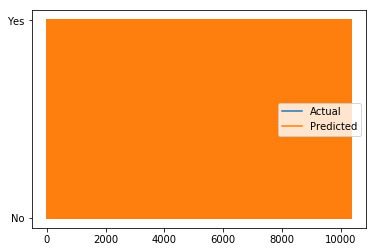

In [81]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [68]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {}}
